# K-Means clustering Airline data Assignment - 7.2

In [1]:

import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
import sklearn.cluster as cluster
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')



In [2]:
airline= pd.read_excel('EastWestAirlines.xlsx',1) 
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
airline.shape

(3999, 12)

In [4]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
airline.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
airline.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
airline.duplicated().sum()

0

In [8]:
airline.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [9]:
airline.nunique()

ID#                  3999
Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
Award?                  2
dtype: int64

In [10]:
airline.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


In [11]:
airline.corr()['Award?']

ID#                 -0.177901
Balance              0.178494
Qual_miles           0.095256
cc1_miles            0.335457
cc2_miles            0.005332
cc3_miles            0.023484
Bonus_miles          0.373506
Bonus_trans          0.333893
Flight_miles_12mo    0.217715
Flight_trans_12      0.247909
Days_since_enroll    0.188121
Award?               1.000000
Name: Award?, dtype: float64

In [12]:
sns.pairplot(airline,hu); 

NameError: name 'hu' is not defined

0    2518
1    1481
Name: Award?, dtype: int64

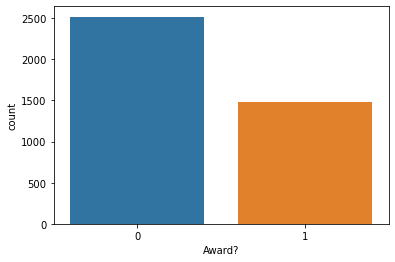

In [13]:
sns.countplot( airline['Award?']  );
airline['Award?'].value_counts()

In [14]:
airline.drop('ID#',axis=1,inplace=True)

In [15]:
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


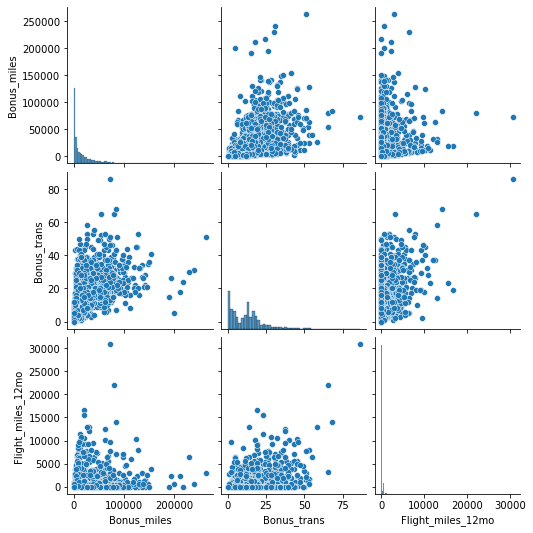

In [18]:
sns.pairplot(airline[['Bonus_miles','Bonus_trans','Flight_miles_12mo']]);

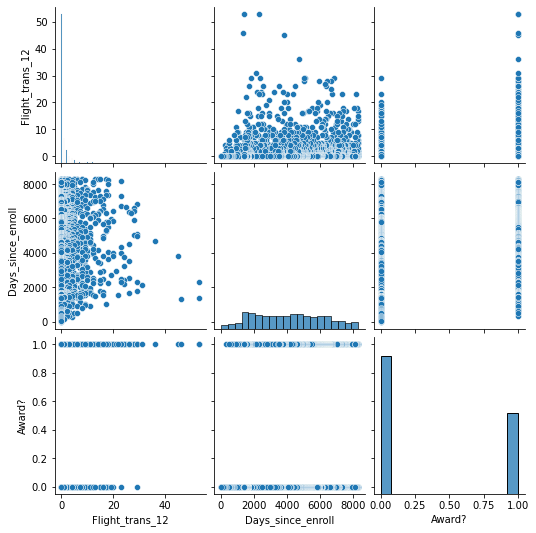

In [18]:
sns.pairplot(airline[['Flight_trans_12','Days_since_enroll','Award?']]);

In [19]:
scaler = MinMaxScaler()
air_scal= scaler.fit_transform(airline)

In [20]:
air_scal

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

# k-Means - Clustering 

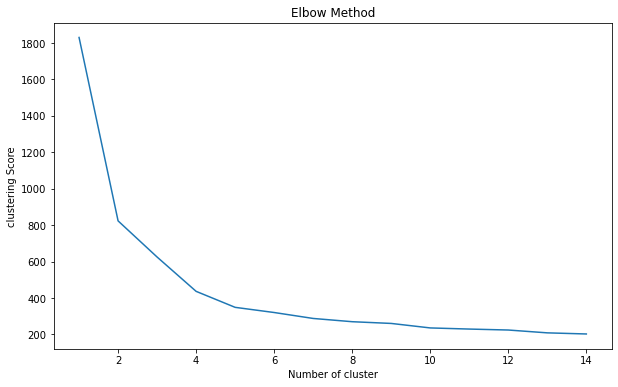

In [21]:
individual_clustering_score = []
for  i in range (1,15):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42 )
    kmeans.fit(air_scal)
    individual_clustering_score.append(kmeans.inertia_)
    
    
    
plt.figure(figsize=(10,6))
plt.plot(range(1,15),individual_clustering_score)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('clustering Score')
plt.show()

In [22]:
individual_clustering_score

[1830.7932128584155,
 823.6756984125225,
 625.1684881570748,
 436.70885761932635,
 348.94332172541465,
 320.54944225752206,
 287.9290916841687,
 270.07398310641923,
 260.5810007564706,
 235.89561696730257,
 229.6787214813321,
 224.4047475603537,
 208.85831472769416,
 202.71561777061788]

In [77]:
kmeans = KMeans(n_clusters =  5 ,  init = 'k-means++', random_state= 42)
kmeans.fit_predict(air_scal)

# pred_y = kmeans.predict(air_scal)
# pred_y

array([2, 2, 2, ..., 1, 3, 3])

In [78]:
kmeans.cluster_centers_

array([[ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -3.88578059e-16],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
         8.03906334e-02,  7.91232441e-03,  1.37379358e-02,
         6.71078504e-01, -3.88578059e-16],
       [ 1.94137515e-02,  8.44382696e-03,  1.76841085e-02,
         8.23643411e-03,  1.69573643e-03,  1.23045313e-02,
         7.17842978e-02,  6.90692719e-03,  1.13902296e-02,
         2.39980966e-01, -4.99600361e-16],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
  

In [79]:
# airline['cluster']= kmeans.labels_

In [80]:
# airline['cluster'].value_counts()

In [81]:
airline['cluster']= pd.DataFrame(pred_y,columns= ['cluster'])

In [82]:
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [83]:
airline['cluster'].value_counts()

4    1032
1     868
0     808
2     673
3     618
Name: cluster, dtype: int64

In [84]:
airline[airline['cluster']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
8,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,104860,0,3,1,1,28426,28,1150,3,6931,1,0
11,96522,0,5,1,1,61105,19,0,0,6924,1,0
15,28495,0,4,1,1,49442,15,0,0,6912,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3931,49519,0,3,1,1,25762,18,0,0,1522,1,0
3954,33972,0,3,1,1,21029,29,0,0,1467,1,0
3973,72297,0,3,1,1,16241,16,0,0,1587,1,0
3979,57793,0,3,1,1,20959,15,1198,3,1424,1,0


In [85]:
clust1= airline[airline['cluster']==1]


In [86]:
clust1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
5,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2296,24277,0,2,1,1,5330,5,0,0,3796,0,1
2299,27904,0,2,1,1,6622,17,0,0,3793,0,1
2300,128620,0,2,1,1,7747,12,0,0,3789,0,1
2302,27135,0,1,1,1,4908,11,0,0,3783,0,1


In [87]:
airline[airline['cluster']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
7,20856,0,1,1,1,5250,4,250,1,6938,1,2
17,13958,0,1,1,1,4291,5,0,0,6905,1,2
21,185681,2024,1,1,1,13300,16,1800,9,6896,1,2
29,19221,0,1,1,1,4655,8,500,1,7896,1,2
36,23193,0,1,1,1,650,4,550,3,7861,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3978,10071,0,2,1,1,27701,16,0,0,1421,1,2
3987,11933,0,1,1,1,249,3,79,1,1412,1,2
3989,2622,0,1,1,1,1625,6,0,0,1404,1,2
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2


In [88]:
airline[airline['cluster']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
6,84914,0,3,1,1,27482,25,0,0,6994,0,3
30,177926,0,3,1,1,20797,13,0,0,7886,0,3
32,276571,0,4,1,1,42044,23,0,0,7872,0,3
44,121260,0,3,1,1,18493,18,0,0,7808,0,3
56,75971,0,4,1,1,34339,14,0,0,6869,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3966,91605,0,4,1,1,37840,18,0,0,1444,0,3
3974,58387,0,3,1,1,14581,39,0,0,1435,0,3
3980,28867,0,3,1,1,19169,28,0,0,1425,0,3
3985,59017,0,4,1,1,34746,25,0,0,1418,0,3


In [89]:
airline[airline['cluster']==4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
1129,1625,0,1,1,1,1375,4,0,0,1547,0,4
1431,44665,0,1,1,1,333,2,333,2,3601,0,4
1549,65021,0,2,1,1,10369,12,0,0,3547,0,4
1552,6341,0,1,1,1,3658,12,0,0,3706,0,4
1553,3641,0,1,1,1,1164,3,0,0,3603,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3990,11310,0,1,1,1,5021,2,0,0,1409,0,4
3992,11181,0,1,1,1,929,12,0,0,1407,0,4
3993,3974,0,1,1,1,365,3,0,0,1397,0,4
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


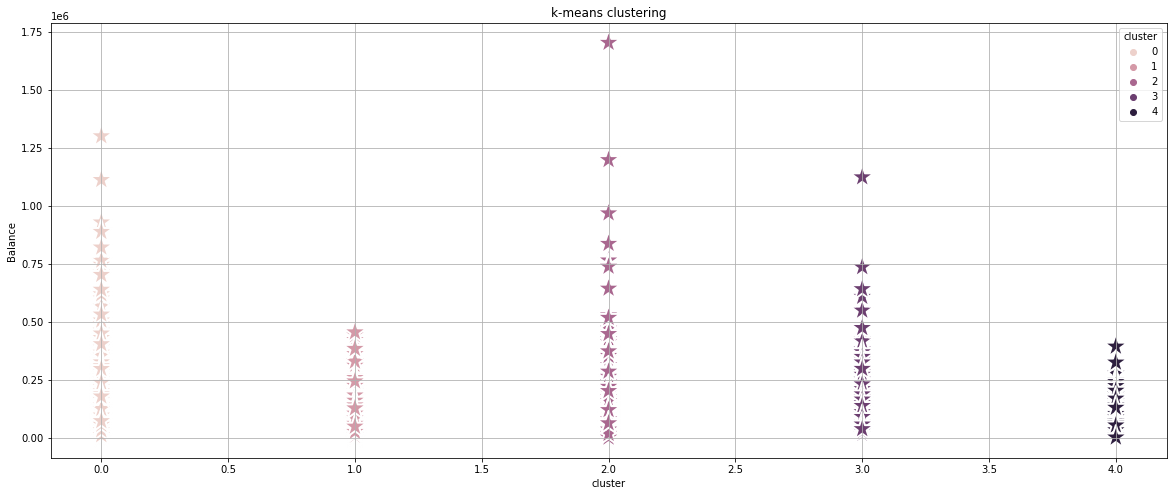

In [156]:
plt.figure(figsize=(20,8))
sns.scatterplot(airline['cluster'],airline['Balance'], hue= 'cluster'  ,c=kmeans.labels_,s=600,marker='*',data=airline) 
plt.grid()
plt.title('k-means clustering')
plt.show(); 

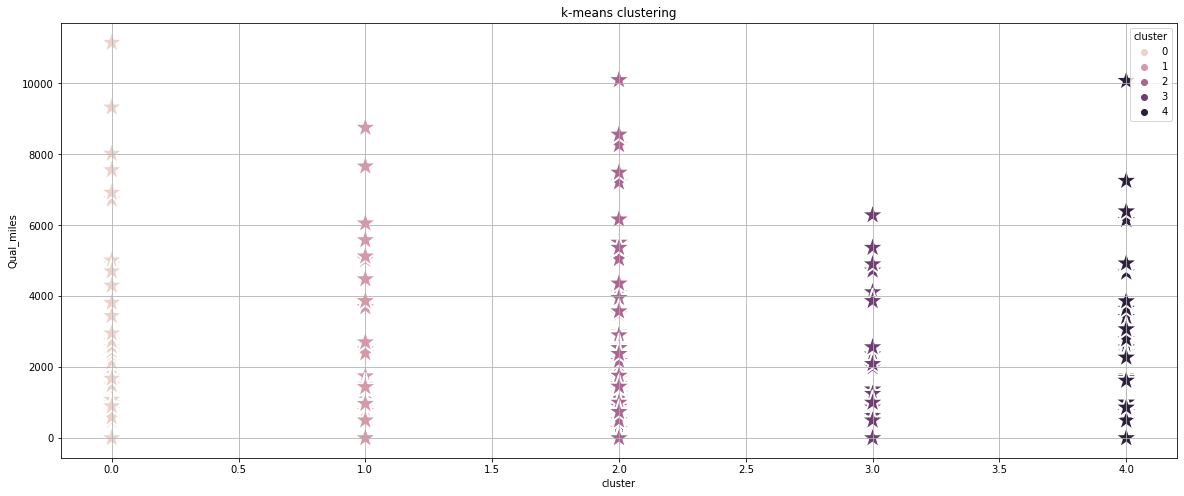

In [157]:
plt.figure(figsize=(20,8))
sns.scatterplot(airline['cluster'],airline ['Qual_miles'], hue= 'cluster'  ,c=kmeans.labels_,s=600,marker='*', data=airline) 
plt.grid()
plt.title('k-means clustering')
plt.show(); 

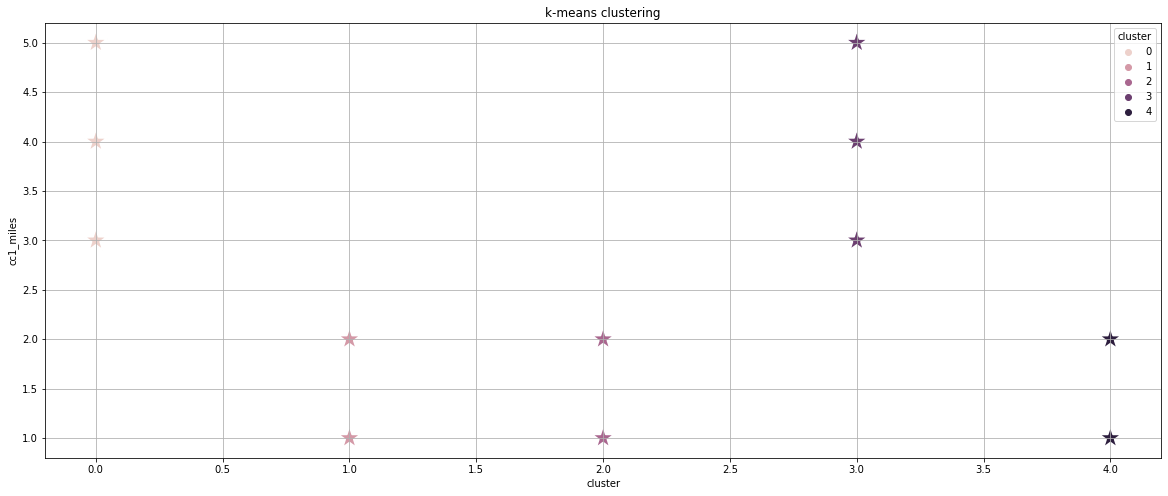

In [158]:
plt.figure(figsize=(20,8))
sns.scatterplot(airline['cluster'],airline['cc1_miles'],hue='cluster',c=kmeans.labels_,s=600,marker='*', data=airline) 
plt.grid()
plt.title('k-means clustering')
plt.show(); 

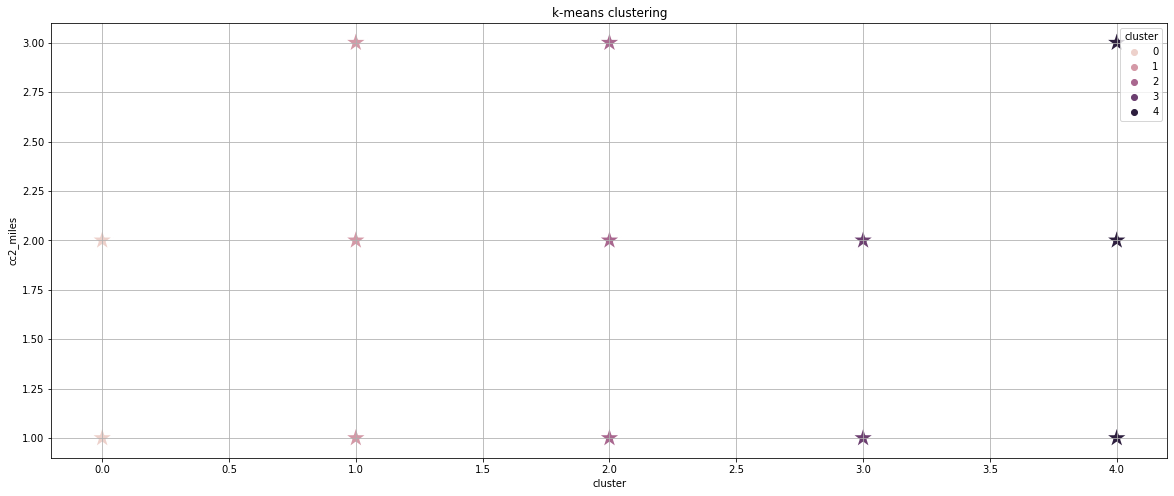

In [159]:
plt.figure(figsize=(20,8))
sns.scatterplot(airline['cluster'],airline['cc2_miles'],hue='cluster',c=kmeans.labels_,s=600,marker='*', data=airline) 
plt.grid()
plt.title('k-means clustering')
plt.show(); 

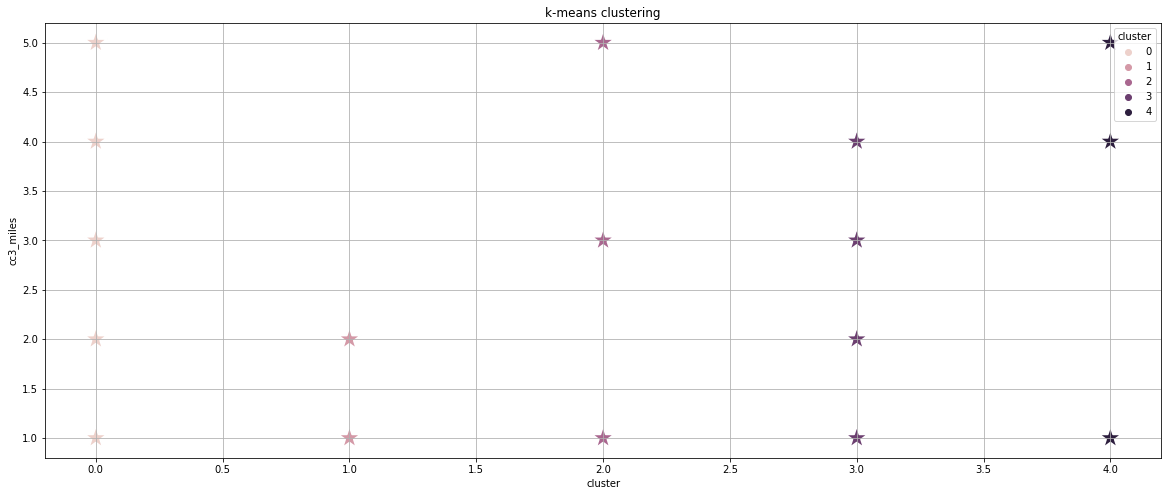

In [160]:
plt.figure(figsize=(20,8))
sns.scatterplot(airline['cluster'],airline['cc3_miles'],hue='cluster',c=kmeans.labels_,s=600,marker='*', data=airline) 
plt.grid()
plt.title('k-means clustering')
plt.show(); 

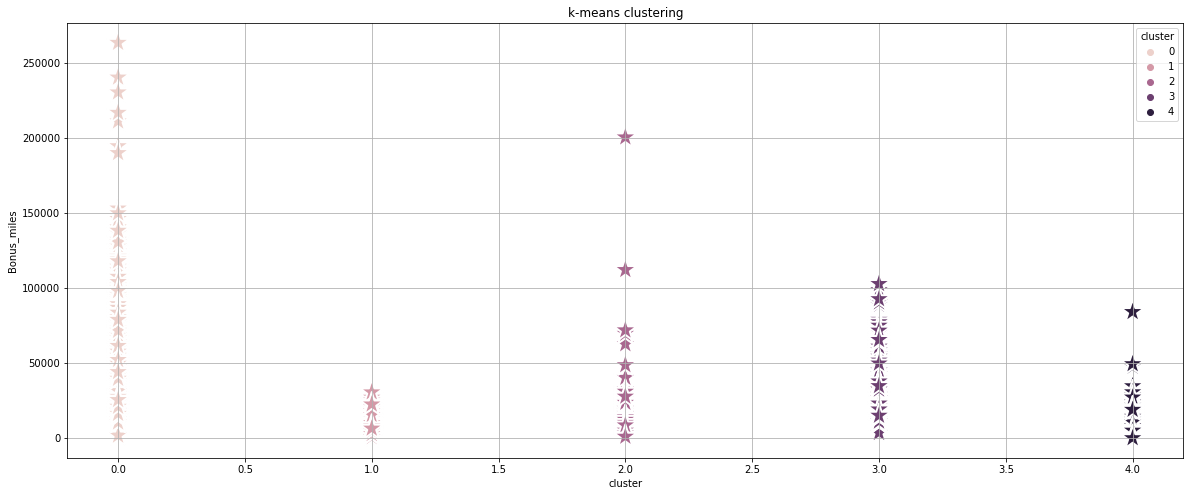

In [161]:
plt.figure(figsize=(20,8))
sns.scatterplot(airline['cluster'],airline['Bonus_miles'],hue='cluster',c=kmeans.labels_,s=600,marker='*', data=airline) 
plt.grid()
plt.title('k-means clustering')
plt.show(); 

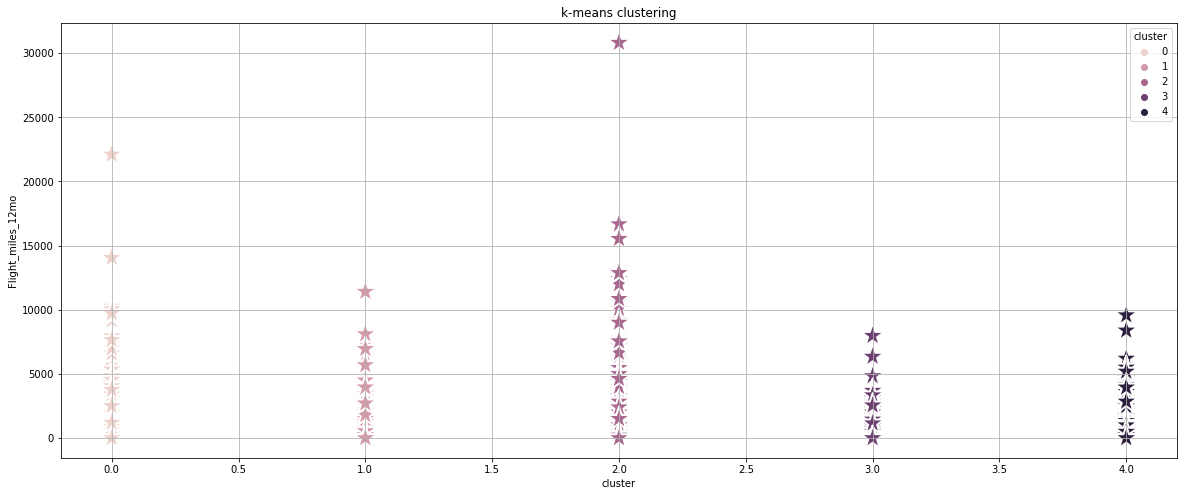

In [162]:
plt.figure(figsize=(20,8))
sns.scatterplot(airline['cluster'],airline['Flight_miles_12mo'],hue='cluster',c=kmeans.labels_,s=600,marker='*', data=airline) 
plt.grid()
plt.title('k-means clustering')
plt.show(); 

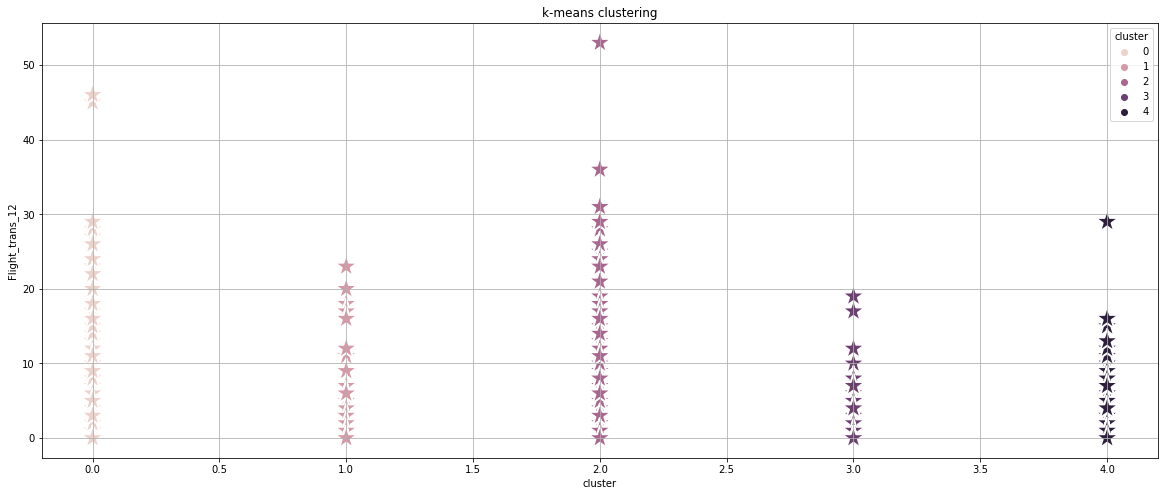

In [163]:
plt.figure(figsize=(20,8))
sns.scatterplot(airline['cluster'],airline['Flight_trans_12'],hue='cluster',c=kmeans.labels_,s=600,marker='*', data=airline) 
plt.grid()
plt.title('k-means clustering')
plt.show(); 

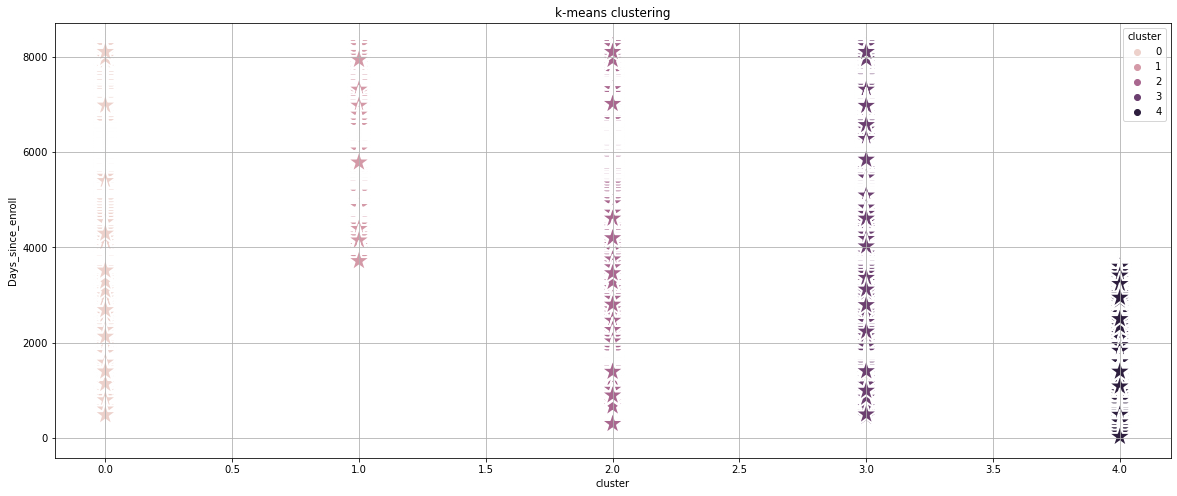

In [164]:
plt.figure(figsize=(20,8))
sns.scatterplot(airline['cluster'],airline['Days_since_enroll'],hue='cluster',c=kmeans.labels_,s=600,marker='*', data=airline) 
plt.grid()
plt.title('k-means clustering')
plt.show(); 

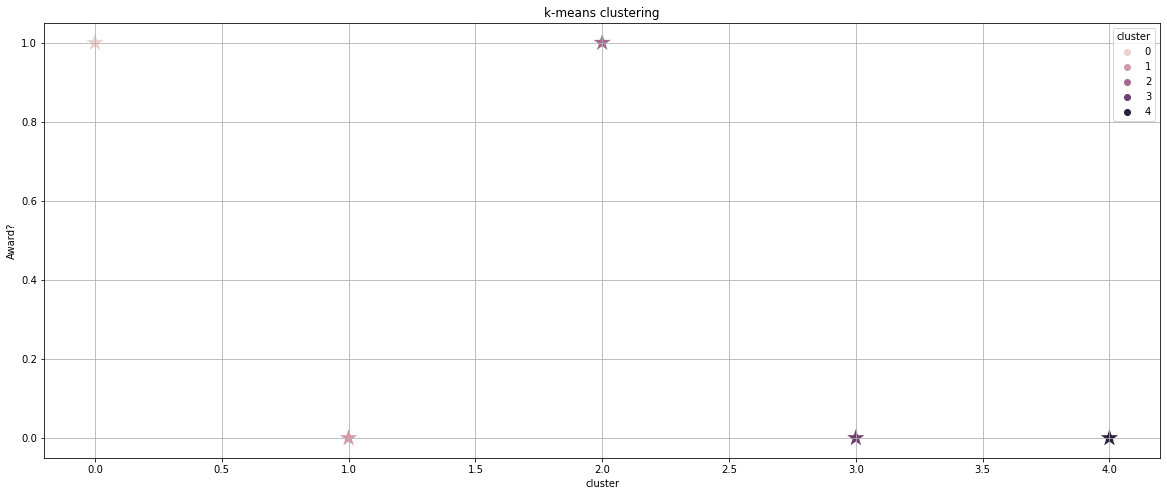

In [165]:
plt.figure(figsize=(20,8))
sns.scatterplot(airline['cluster'],airline['Award?'],hue='cluster',c=kmeans.labels_,s=600,marker='*', data=airline) 
plt.grid()
plt.title('k-means clustering')
plt.show(); 

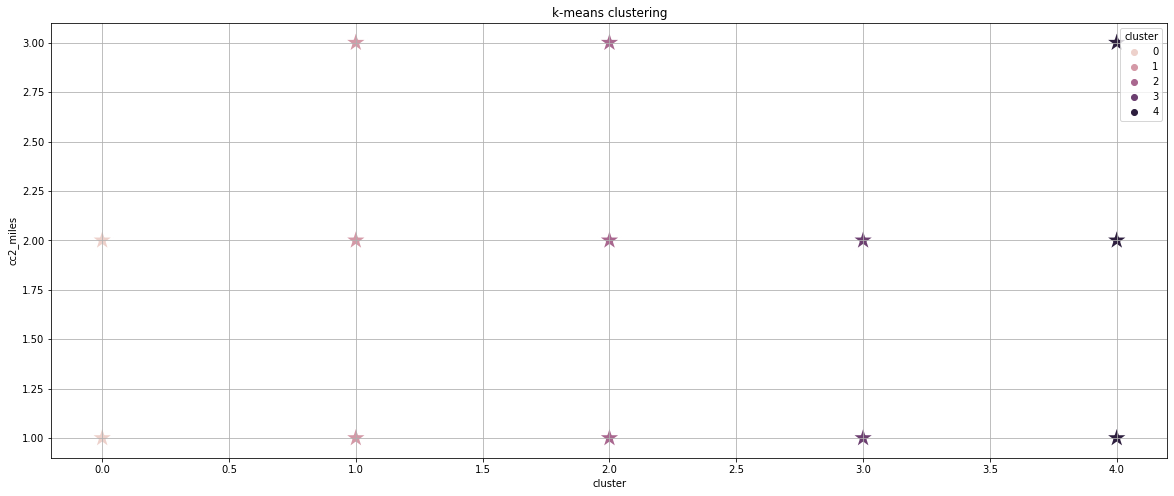

In [166]:
plt.figure(figsize=(20,8))
sns.scatterplot(airline['cluster'],airline['cc2_miles'],hue='cluster',c=kmeans.labels_,s=600,marker='*', data=airline) 
plt.grid()
plt.title('k-means clustering')
plt.show(); 

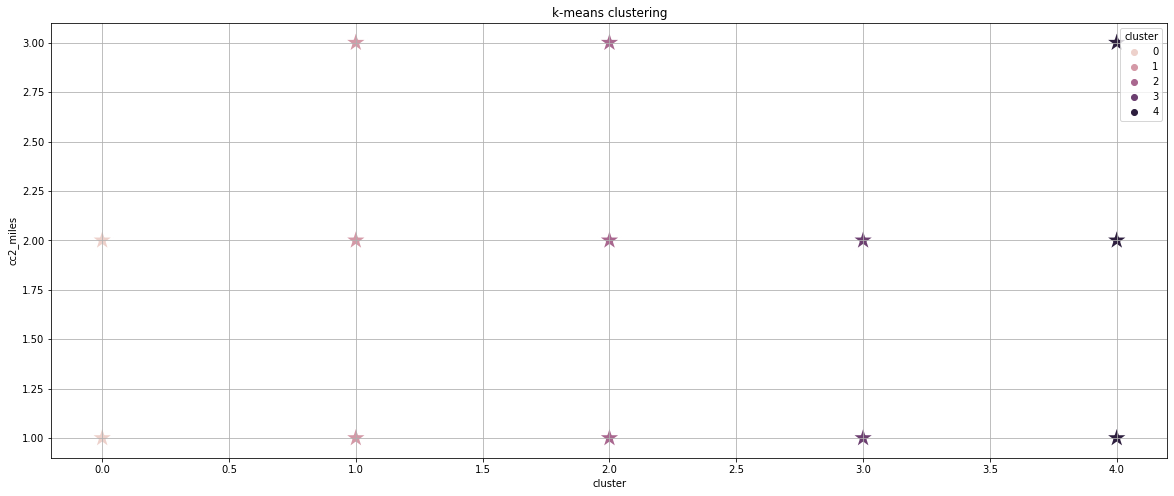

In [167]:
plt.figure(figsize=(20,8))
sns.scatterplot(airline['cluster'],airline['cc2_miles'],hue='cluster',c=kmeans.labels_,s=600,marker='*', data=airline) 
plt.grid()
plt.title('k-means clustering')
plt.show(); 

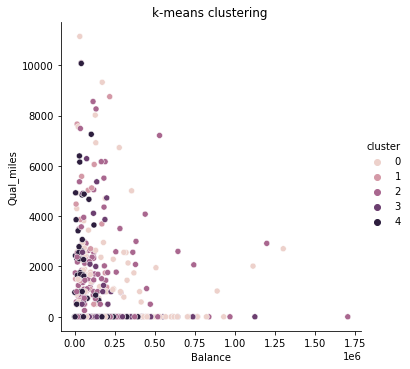

In [168]:
sns.relplot('Balance','Qual_miles',data= airline, hue='cluster')
plt.title('k-means clustering ');

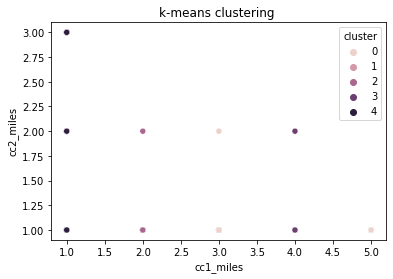

In [154]:
sns.scatterplot('cc1_miles','cc2_miles',data= airline, hue='cluster')
plt.title('k-means clustering ');

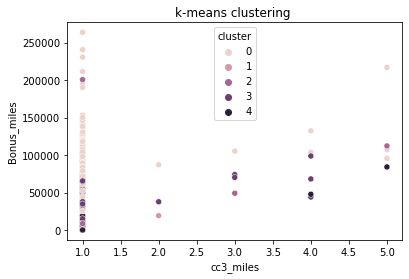

In [155]:
sns.scatterplot('cc3_miles','Bonus_miles',data= airline, hue='cluster',)
plt.title('k-means clustering ');